In [88]:
from sklearn.datasets import *
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [89]:
#Выводим данные
wine = load_wine()
data = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                   columns= wine['feature_names']+['target'])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [90]:
data.shape

(178, 14)

In [91]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [92]:
#Разделение признаков
x = data.drop('target', axis=1)
y = data['target']

In [93]:
#Построение модели
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [94]:
#Оценка модели(Оценка равна 1 в случае очень маленького набора данных)
model.score(x,y)

1.0

[Text(0.4230769230769231, 0.9, 'X[6] <= 1.575\nentropy = 1.567\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.15384615384615385, 0.7, 'X[9] <= 3.825\nentropy = 0.771\nsamples = 62\nvalue = [0, 14, 48]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.23076923076923078, 0.5, 'X[3] <= 17.15\nentropy = 0.144\nsamples = 49\nvalue = [0, 1, 48]'),
 Text(0.15384615384615385, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3076923076923077, 0.3, 'entropy = 0.0\nsamples = 48\nvalue = [0, 0, 48]'),
 Text(0.6923076923076923, 0.7, 'X[12] <= 724.5\nentropy = 1.0\nsamples = 116\nvalue = [59, 57, 0]'),
 Text(0.5384615384615384, 0.5, 'X[0] <= 13.175\nentropy = 0.133\nsamples = 54\nvalue = [1, 53, 0]'),
 Text(0.46153846153846156, 0.3, 'entropy = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(0.6153846153846154, 0.3, 'X[9] <= 4.08\nentropy = 0.811\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.5384615384615384, 0.1, 'entropy = 0.0\nsamples = 3\nva

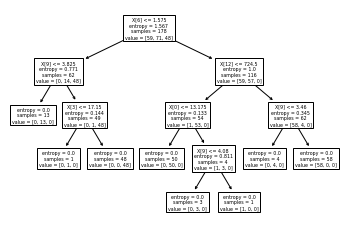

In [95]:
#Визуализирование данных
tree.plot_tree(model)

In [96]:
data.isnull().sum() #В нашем наборе нет пропусков

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [97]:
#Разделим данные
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [98]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [99]:
y_pred = regressor.predict(x_test)
print('Дерево решений')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Дерево решений
Mean Absolute Error: 0.08333333333333333
Mean Squared Error: 0.08333333333333333
Root Mean Squared Error: 0.28867513459481287


In [100]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['target'], axis=1), data['target'], test_size=0.5, random_state=17)

In [101]:
# Feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [102]:

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [103]:
print('Случайный лес')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Случайный лес
Mean Absolute Error: 0.11797752808988764
Mean Squared Error: 0.04741573033707866
Root Mean Squared Error: 0.2177515334896144
